In [83]:
import matplotlib
matplotlib.use('TkAgg')  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from wordcloud import WordCloud
%matplotlib inline  
from scipy import stats
import seaborn as sns

In [84]:
parquet_file = "..\Datasets\dataset_peliculas.parquet"
df = pd.read_parquet(parquet_file)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15004\361170108.py:1: SyntaxWarning: invalid escape sequence '\D'
  parquet_file = "..\Datasets\dataset_peliculas.parquet"


In [85]:
df

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,[English],Released,nan,Toy Story,7.7,5415,1995,12.45,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995,4.04,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,1995,0.00,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,1995,5.09,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,1995,0.00,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45506,,0,"[Drama, Family]",439050,fa,Rising and falling between a man and woman.,0.072051,[],[Iran],NaT,...,[فارسی],Released,Rising and falling between a man and woman,Subdue,4.0,1,0,0.00,"[Leila Hatami, Kourosh Tahami, Elham Korda]",[Hamid Nematollah]
45507,,0,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[Philippines],2011-11-17,...,[],Released,nan,Century of Birthing,9.0,3,2011,0.00,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Lav Diaz]
45508,,0,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],2003-08-01,...,[English],Released,A deadly game of wits.,Betrayal,3.8,6,2003,0.00,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester]
45509,,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[Russia],1917-10-21,...,[],Released,nan,Satan Triumphant,0.0,0,1917,0.00,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov]


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45433 entries, 0 to 45510
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45433 non-null  object        
 1   budget                 45433 non-null  int32         
 2   genres                 45433 non-null  object        
 3   id                     45433 non-null  int32         
 4   original_language      45433 non-null  object        
 5   overview               45433 non-null  object        
 6   popularity             45430 non-null  float64       
 7   production_companies   45433 non-null  object        
 8   production_countries   45433 non-null  object        
 9   release_date           45346 non-null  datetime64[ns]
 10  revenue                45433 non-null  int32         
 11  runtime                45433 non-null  int32         
 12  spoken_languages       45433 non-null  object        
 13  status

In [87]:
def check_nul():
    dfcol = df.columns.tolist()
    temp_l = []
    problemas = False
    for element in dfcol:
        num_val = df[element].isna().sum()
        if num_val != 0:
            print(f"Hay {num_val} valores nulos en la columna {element}")
            temp_l.append(element)
            problemas = True

    dfcol = df[temp_l]

    for col in dfcol.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"'{col}' es una columna con datos numericos")
        elif pd.api.types.is_string_dtype(df[col]):
            print(f"'{col}' es una columna con datos de texto")
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"'{col}' es una columna con datos de fecha")
        else:
            print(f"'{col}' es una columna con datos iterables")

    if problemas == False: print('Todo en orden!')

In [88]:
check_nul()

Hay 3 valores nulos en la columna popularity
Hay 87 valores nulos en la columna release_date
Hay 3 valores nulos en la columna vote_average
'popularity' es una columna con datos numericos
'release_date' es una columna con datos de fecha
'vote_average' es una columna con datos numericos


In [89]:
popularity_na = df[df['popularity'].isna()].index.tolist()
release_date_na = df[df['release_date'].isna()].index.tolist()
vote_average_na = df[df['vote_average'].isna()].index.tolist()
cast_na = df[df['cast'].isna()].index.tolist()
crew_na = df[df['crew'].isna()].index.tolist()

print(f"{popularity_na}")
print(f"{release_date_na}")
print(f"{vote_average_na}")
print(f"{cast_na}")
print(f"{crew_na}")


[19753, 29540, 35627]
[712, 735, 3463, 3631, 5888, 13856, 14821, 16859, 16976, 17363, 17406, 18062, 18386, 18596, 19346, 19753, 19980, 20128, 20191, 20326, 20656, 21194, 21735, 21983, 22045, 22823, 24075, 24182, 24764, 27539, 29540, 30437, 30647, 31118, 31269, 31500, 32205, 32776, 33396, 34286, 34321, 34481, 34491, 35627, 36462, 36565, 36989, 37255, 37326, 37330, 37502, 37684, 37698, 38370, 38907, 39381, 39646, 40123, 40183, 40244, 40782, 40823, 41094, 41111, 41156, 41441, 41760, 42221, 42610, 42615, 42983, 43132, 43419, 43565, 44004, 44056, 44107, 44140, 44338, 44840, 45022, 45114, 45192, 45247, 45383, 45455, 45506]
[19753, 29540, 35627]
[]
[]


Revisamos las peliculas '19753, 29540, 35627' que contienen espacios vacios en multiples columnas

In [90]:
df.loc[popularity_na]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
19753,,0,"[Action, Thriller, Drama]",82663,en,British soldiers force a recently captured IRA...,NaN,[],[],NaT,...,[],nan,nan,nan,NaN,0,0,0.0,"[Rob Lowe, Kenneth Cranham, Deborah Moore, Han...",[Lawrence Gordon Clark]
29540,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,Third film of the Mardock Scramble series.,NaN,[],[],NaT,...,[],nan,nan,nan,NaN,0,0,0.0,"[Megumi Hayashibara, Hiroki Touchi, Kazuya Nak...",[Susumu Kudo]
35627,,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,A group of skiers are terrorized during spring...,NaN,[],[],NaT,...,[],nan,nan,nan,NaN,0,0,0.0,"[Alexander Mendeluk, Kate Nauta, Benjamin East...",[Scott Wheeler]


3 peliculas encontradas, muchos valores faltantes. Observando la seccion 'overview' podemos ver que una de ellas es la 3er pelicula de la saga 'Mardock Scramble Collection'. Googleo rapido nos permite encontrar la pelicula. Cambiamos lo necesario.

Dos peliculas restantes no se considera un numero significativo, se eliminan.

In [91]:
df.loc[29540, ['popularity', 'release_date', 'title', 'vote_average']] = [0, pd.to_datetime('2012-09-29'), 'Marudukku sukuranburu: Haiki', 0 ]
popularity_na.remove(29540)

df.drop(popularity_na, inplace=True)

In [92]:
check_nul()

Hay 84 valores nulos en la columna release_date
'release_date' es una columna con datos de fecha


Revisamos la fila iterable

In [93]:
df.loc[42925]

belongs_to_collection                                                     
budget                                                                   0
genres                                                                  []
id                                                                  401840
original_language                                                       es
overview                 Two high school kids mentored by a nightclub o...
popularity                                                        0.207775
production_companies                                                    []
production_countries                                                    []
release_date                                           2017-05-30 00:00:00
revenue                                                                  0
runtime                                                                  0
spoken_languages                                                        []
status                   

La fila esta completa exceptuando las columnas 'cast' y 'crew'. Aplicamos una funcion lambda sobre las columnas 'cast' y 'crew' que covierta los valores nulos por listas vacias para que sea una columna iterable para mantener la consistencia de datos.

In [94]:
check_nul()

Hay 84 valores nulos en la columna release_date
'release_date' es una columna con datos de fecha


In [95]:
for elemento in vote_average_na:
    if elemento in release_date_na:
        release_date_na.remove(elemento)
if crew_na in release_date_na: release_date_na.remove(crew_na)

observ = df.loc[release_date_na]
observ = observ.drop(columns='release_date')

El 90.48% de los datos de este subset tiene 2 o menos generos, y el 83.33% tiene menos de 2. Se asume que los generos son importantes para el sistema de recomendacion


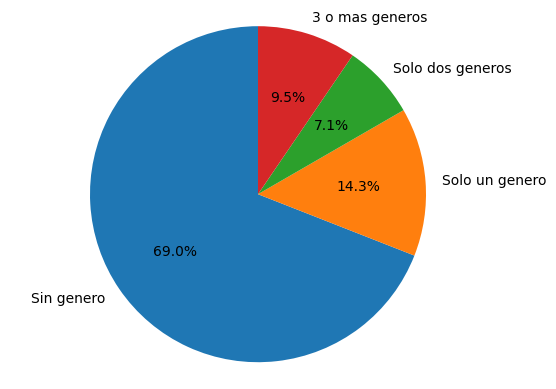

In [96]:
ob_gen_nul = observ['genres'].apply(lambda x: len(x) == 0).sum()
ob_gen_1 = observ['genres'].apply(lambda x: len(x) == 1).sum()
ob_gen_2 = observ['genres'].apply(lambda x: len(x) == 2).sum()
ob_gen_3 = observ['genres'].apply(lambda x: len(x) >= 3).sum()
ob_tot = observ.shape[0]
labels = 'Sin genero', 'Solo un genero', 'Solo dos generos', '3 o mas generos'
sizes = [ob_gen_nul, ob_gen_1, ob_gen_2, ob_gen_3]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round(((ob_gen_nul+ob_gen_1+ob_gen_2)/ob_tot)*100, 2)}% de los datos de este subset tiene 2 o menos generos, y el {round(((ob_gen_nul+ob_gen_1)/ob_tot)*100, 2)}% tiene menos de 2. Se asume que los generos son importantes para el sistema de recomendacion')

In [97]:
v_avg = round(observ['vote_average'].mean(), 2)
v_cnt = round(observ['vote_count'].mean(), 2)
v_cnt_m = round(observ['vote_count'].max(), 2)
crew_e = observ['crew'].apply(lambda x: len(x) == 0).sum()
cast_e = observ['cast'].apply(lambda x: len(x) == 0).sum()
crew_e

print(f'De este subset de peliculas podemos obtener estos datos:\nLa valoracion promedio de las peliculas es de {v_avg}\nLa cantidad de valoraciones promedio es de {v_cnt}\n\nPor todo esto se considera que los datos no son valiosos para el sistema de recomendacion\n')
print(f'Ademas, de los datos {ob_tot-cast_e} contienen info de los actores y {ob_tot-crew_e} de los directores, por lo que tampoco se determinan utiles para las funciones.')

De este subset de peliculas podemos obtener estos datos:
La valoracion promedio de las peliculas es de 2.45
La cantidad de valoraciones promedio es de 2.35

Por todo esto se considera que los datos no son valiosos para el sistema de recomendacion

Ademas, de los datos 18 contienen info de los actores y 32 de los directores, por lo que tampoco se determinan utiles para las funciones.


In [98]:
df.dropna(subset=['release_date'], inplace=True)

check_nul()

Todo en orden!


In [99]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"'{col}' es una columna con datos numericos")
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        print(f"'{col}' es una columna con datos de fecha")

'budget' es una columna con datos numericos
'id' es una columna con datos numericos
'popularity' es una columna con datos numericos
'release_date' es una columna con datos de fecha
'revenue' es una columna con datos numericos
'runtime' es una columna con datos numericos
'vote_average' es una columna con datos numericos
'vote_count' es una columna con datos numericos
'release_year' es una columna con datos numericos
'return' es una columna con datos numericos


De los numericos, budget y revenue son columnas con mucho rango, puesto muchos valores vacios y algunos valores extremos.

No creo que sea necsario ni posible hacer un hacer un manejo de outliers razonable.

Return sin embargo deberia dar un valor de entre 0 y 100 (porcentaje).

In [100]:
z_scores = stats.zscore(df['return'])
outliers = df[(z_scores > 1) | (z_scores < -1)]
outliers[['title', 'budget', 'revenue', 'return']]

,title,budget,revenue,return
2310,"The Karate Kid, Part II",113,115103979,1018619.28
3345,Modern Times,1,8500000,8500000.00
4003,Less Than Zero,1,12396383,12396383.00
14392,Welcome to Dongmakgol,8,33579813,4197476.62
22303,Aquí Entre Nos,1,2755584,2755584.00
26028,Nurse 3-D,10,10000000,1000000.00


Se considera que los datos en la columna budget (y por lo tanto) return son erroneos, se los elimina e iguala a 0.

In [101]:
lis_outl = outliers.index.tolist()
df.loc[lis_outl, ['budget', 'return']] = [0, 0]

In [102]:
z_scores = stats.zscore(df['return'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='budget')

,title,budget,revenue,return
19282,"Love, Wedding, Marriage",1,1378,1378.00
16688,From Prada to Nada,93,2500000,26881.72
8222,Tarnation,218,1162014,5330.34
41514,The Tiger: An Old Hunter's Tale,5000,11083449,2216.69
3557,Eraserhead,10000,7000000,700.00
2250,Pink Flamingos,12000,6000000,500.00
14212,Paranormal Activity,15000,193355800,12890.39
2598,The Blair Witch Project,60000,248000000,4133.33
7798,Super Size Me,65000,28575078,439.62
4320,The Way of the Dragon,130000,85000000,653.85


Dentro de los outliers esta vez se encuentra un grupo mas reducido.

Se considera que la mayoria son outliers naturales, sin embargo se comprueba los 5 mas llamativos respecto a su budget y se confirma que hay errores en 2 de ellos.

In [103]:
df.loc[[19282, 16688], ['budget', 'return']] = [0, 0]

Se determina que la posibilidad de que el dato de budget sea mayor que 0 pero menor que 100 es baja.

In [104]:
z_scores = stats.zscore(df['return'])
outliers = df[df['budget'].apply(lambda x: x != 0 and x < 100)]
otl = outliers.index.tolist()
outliers[['title', 'budget', 'revenue', 'return']].sort_values(by='return', ascending=False)

,title,budget,revenue,return
2485,Lost & Found,1,100,100.00
29585,Falling From Grace,3,232,77.33
39758,The Cherry Orchard,5,135,27.00
5254,Every Which Way But Loose,5,85,17.00
16932,Boy,3,43,14.33
...,...,...,...,...
20502,To.get.her,86,0,0.00
19931,We Should Not Exist,1,0,0.00
19390,Bigfoot Lives,35,0,0.00
16705,The Misadventures of Margaret,5,0,0.00


Se eliminan e igualan a 0 para reducir problemas en la funcion get_actor y get_director

In [105]:
df.loc[otl, ['budget', 'return']] = [0, 0]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45347 entries, 0 to 45510
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45347 non-null  object        
 1   budget                 45347 non-null  int32         
 2   genres                 45347 non-null  object        
 3   id                     45347 non-null  int32         
 4   original_language      45347 non-null  object        
 5   overview               45347 non-null  object        
 6   popularity             45347 non-null  float64       
 7   production_companies   45347 non-null  object        
 8   production_countries   45347 non-null  object        
 9   release_date           45347 non-null  datetime64[ns]
 10  revenue                45347 non-null  int32         
 11  runtime                45347 non-null  int32         
 12  spoken_languages       45347 non-null  object        
 13  status

Se considera que se hicieron cambios suficientes para el correcto funcionamiento de las funciones (exceptuando recomendacion)

Se exporta el archivo a parquet nuevamente.

In [107]:
import pyarrow as pa
import pyarrow.parquet as pq
parquet_filename = '../Datasets/dataset_peliculas.parquet'
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_filename)

# Sistema de recomendacion
Realizamos una observacion del Data Frame desde el punto de vista de el sistema de recomendacion.

In [108]:
parquet_file = "..\Datasets\dataset_peliculas.parquet"
df = pd.read_parquet(parquet_file)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15004\361170108.py:1: SyntaxWarning: invalid escape sequence '\D'
  parquet_file = "..\Datasets\dataset_peliculas.parquet"


### Puntos a tener en cuenta:
- Con que informacion contamos
- Que tipo de modelos se adaptan mejor
- Que cambios hay que realizar para su funcionamiento

In [109]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,[English],Released,nan,Toy Story,7.7,5415,1995,12.45,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995,4.04,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,1995,0.00,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,1995,5.09,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,1995,0.00,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


Debido a la falta de usuarios hacer un algoritmo de recomendacion en base a similitud de usuario es inviable.

En ese caso el algoritmo tiene que analizar la similitud de los elementos entre si para recomendar los 5 titulos mas similares al inputado.

Las columnas absolutamente necesarias son:
- title: Para busqueda y devolucion de resultado
- vote_average: Para ordenar la lista de recomendacion como especifica el cliente

Las columnas que definen mas apropiadamente las caracteristicas mas similares entre dos titulos son: 
- genre: Es una forma rapida de observar las caracteristicas generales de la pelicula en forma de palabras claves/etiquetas
- overview: Es una forma de observar rapidamente la tematica de la pelicula
- production_companies: Es posible que haya una similitud entre las caracteristicas de la pelicula y la productora
- production_countries: Es posible que haya una similitud entre las caracteristicas de la pelicula y el pais de origen
- crew: Es posible que haya una similitud entre las caracteristicas de la pelicula y el director/es
- cast: Es posible que haya un interes entre peliculas donde participaron los mismos actores

### Columnas inviables:

#### Budget:

El 80.73% de de esta columna no tiene datos.


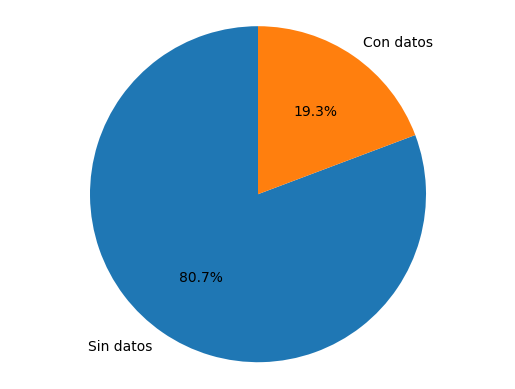

In [110]:
bud_gen_nul = df['budget'].apply(lambda x: x == 0).sum()
bud_gen_1 = df['budget'].apply(lambda x: x != 0).sum()
tot = df.shape[0]
labels = 'Sin datos', 'Con datos'
sizes = [bud_gen_nul, bud_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((bud_gen_nul/tot)*100, 2)}% de de esta columna no tiene datos.')

No solo se sospecha que no es relevante en la similitud entre peliculas, sino que tiene muchos valores nulos.

In [111]:
df.drop('budget', axis=1, inplace=True)

#### Revenue

El 83.69% de de esta columna no tiene datos.


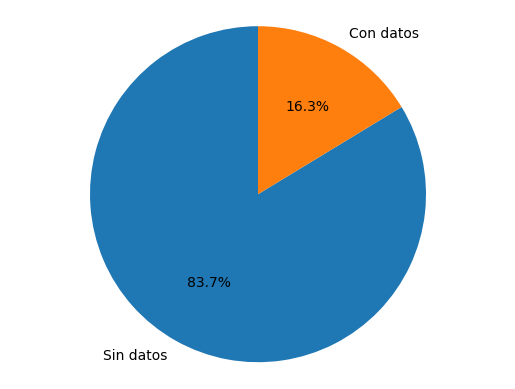

In [112]:
rev_gen_nul = df['revenue'].apply(lambda x: x == 0).sum()
rev_gen_1 = df['revenue'].apply(lambda x: x != 0).sum()
labels = 'Sin datos', 'Con datos'
sizes = [rev_gen_nul, rev_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((rev_gen_nul/tot)*100, 2)}% de de esta columna no tiene datos.')

Ocurre algo similar con la columna revenue

In [113]:
df.drop('revenue', axis=1, inplace=True)

#### Return

Return es el resultado de la division entre budget y revenue, por lo tanto tiene similar cantidad de valores nulos.

El 88.37% de de esta columna no tiene datos.


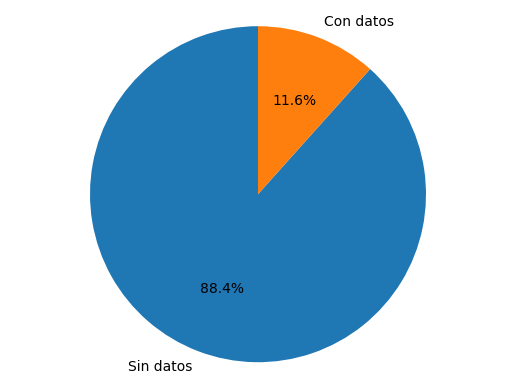

In [114]:
ret_gen_nul = df['return'].apply(lambda x: x == 0).sum()
ret_gen_1 = df['return'].apply(lambda x: x != 0).sum()
tot = df.shape[0]
labels = 'Sin datos', 'Con datos'
sizes = [ret_gen_nul, ret_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((ret_gen_nul/tot)*100, 2)}% de de esta columna no tiene datos.')


In [115]:
df.drop('return', axis=1, inplace=True)

#### Tagline

Tagline funciona de manera similar a overview, por lo que se supone redundancia innecesaria.

In [116]:
from wordcloud import WordCloud

Palabras mas comunes de la columna "tagline"


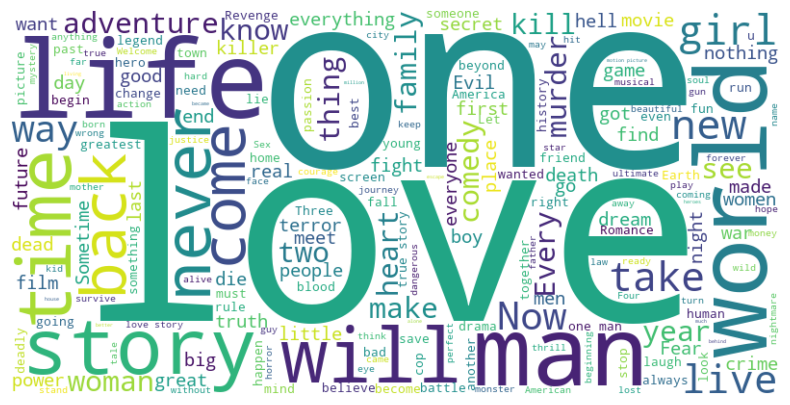

In [117]:
wrdc_tag = " ".join(tagline for tagline in df['tagline'].dropna())
wrdc_tag = wrdc_tag.replace("nan", "")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wrdc_tag)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

print('Palabras mas comunes de la columna "tagline"')

Palabras mas comunes de la columna "overview"


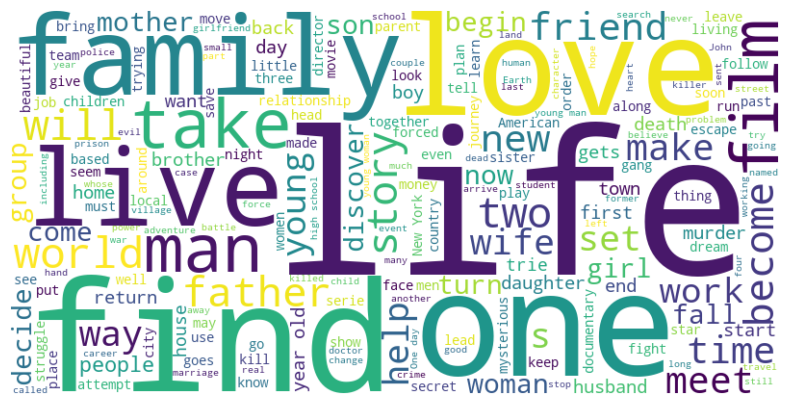

In [118]:
wrdc_over = " ".join(tagline for tagline in df['overview'].dropna())
wrdc_over = wrdc_over.replace("nan", "")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wrdc_over)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

print('Palabras mas comunes de la columna "overview"')

Ademas tiene un alto porcentaje de faltantes.

El 55.04% de de esta columna no tiene datos.


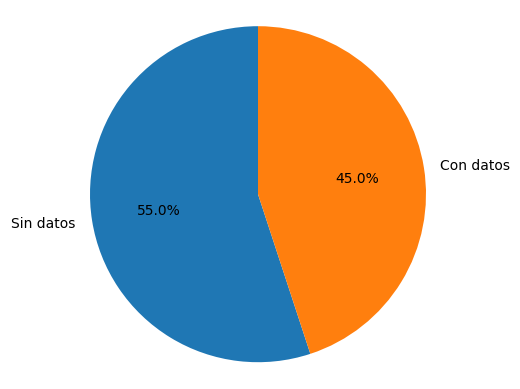

In [119]:
tag_gen_nul = df['tagline'].apply(lambda x: x == 'nan').sum()
tag_gen_1 = df['tagline'].apply(lambda x: x != 'nan').sum()
tot = df.shape[0]
labels = 'Sin datos', 'Con datos'
sizes = [tag_gen_nul, tag_gen_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((tag_gen_nul/tot)*100, 2)}% de de esta columna no tiene datos.')

In [120]:
df.drop('tagline', axis=1, inplace=True)

#### Status

Las peliculas que tengan un status diferente a released no deberian ser recomendadas pues no es posible verlas.

In [121]:
df.drop(df[df['status'] != 'Released'].index, inplace=True)
rel_tot = df.shape[0]

print(f'Peliculas totales: {tot}')
print(f'Peliculas que no tengan un Status de Released: {tot-rel_tot}')
print(f'Peliculas finales en el Data Frame: {rel_tot}')

Peliculas totales: 45347
Peliculas que no tengan un Status de Released: 440
Peliculas finales en el Data Frame: 44907


Una vez completado el proceso, no hay uso para la columna status

In [122]:
df.drop('status', axis=1, inplace=True)

# original_language y spoken_language

original_language tiene datos redundantes con spoken_language.

In [123]:
from collections import Counter

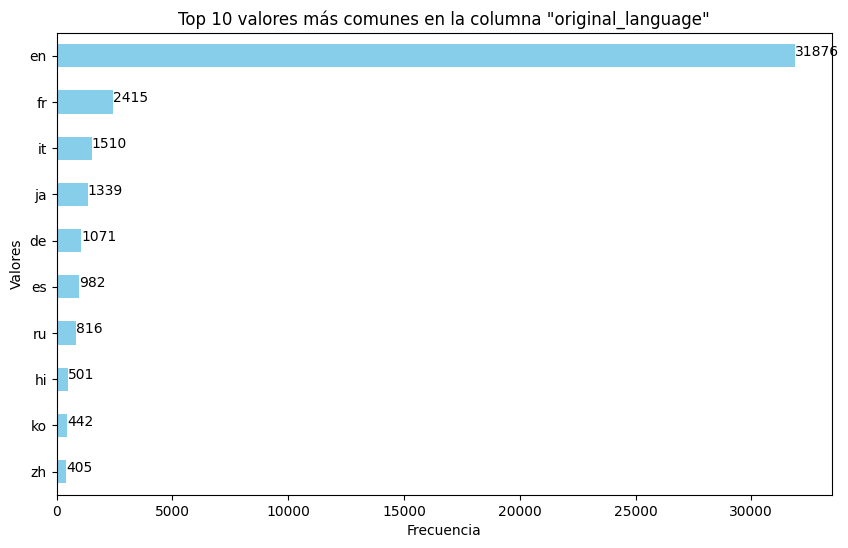

In [124]:
comm_lan = df['original_language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = comm_lan.plot(kind='barh', color='skyblue')

for index, value in enumerate(comm_lan):
    plt.text(value, index, str(value))

plt.xlabel('Frecuencia')
plt.ylabel('Valores')
plt.title('Top 10 valores más comunes en la columna "original_language"')
plt.gca().invert_yaxis()

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  func(*args, **kwargs)


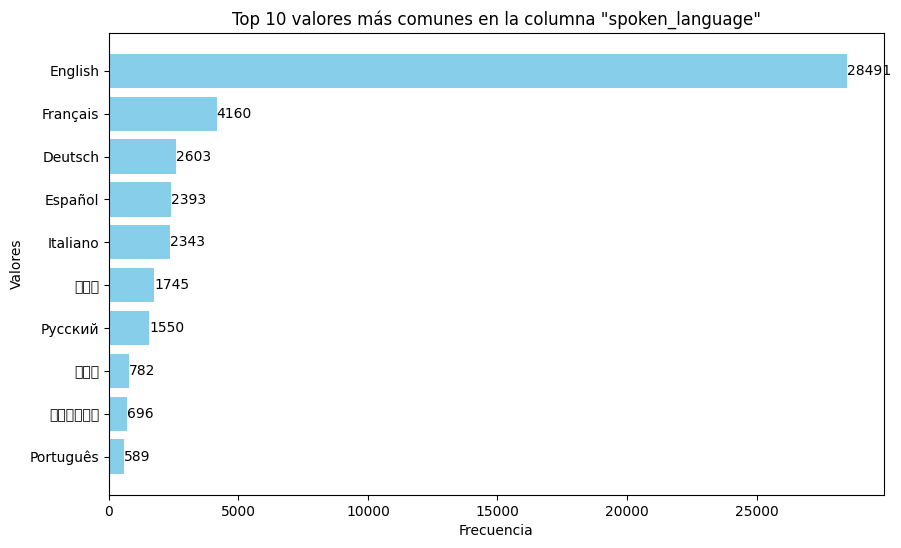

In [125]:
flat_lang = [item for sublist in df['spoken_languages'] for item in sublist]
lang_count = Counter(flat_lang)

comm_sp_lan = lang_count.most_common(10)
labels, values = zip(*comm_sp_lan)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color='skyblue')

for bar, value in zip(bars, values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(value), va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Valores')
plt.title('Top 10 valores más comunes en la columna "spoken_language"')
plt.gca().invert_yaxis()

Se sospecha que ambas son redundantes con la columna 'production_countries'

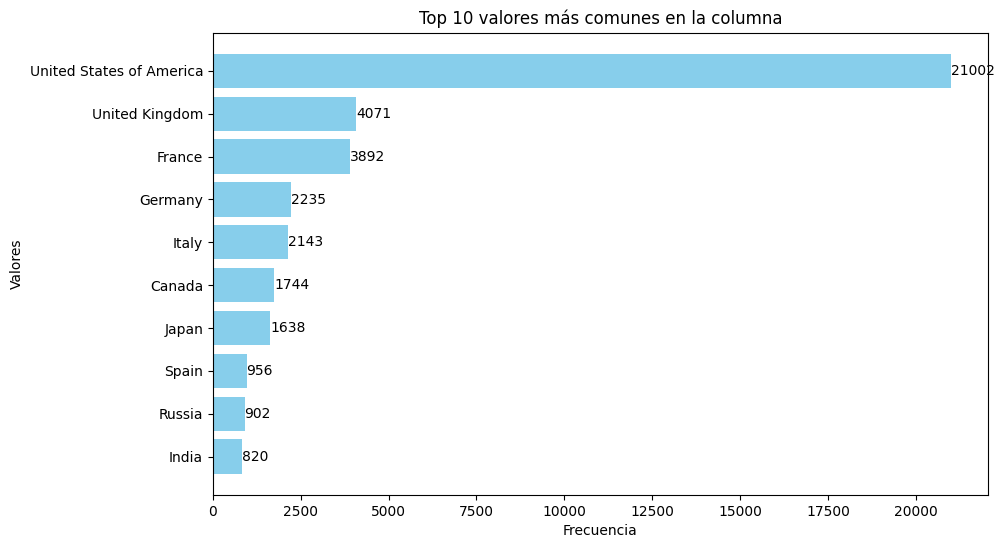

In [126]:
flat_countries = [item for sublist in df['production_countries'] for item in sublist]
countries_count = Counter(flat_countries)

comm_countries = countries_count.most_common(10)
labels, values = zip(*comm_countries)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color='skyblue')

for bar, value in zip(bars, values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, str(value), va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Valores')
plt.title('Top 10 valores más comunes en la columna')
plt.gca().invert_yaxis()

Debido a la redundancia de los datos y menor relevancia en el analisis de similitud de caracteristicas, se decide reducir el dataset eliminando las columnas spoken_languages y original_language.

In [127]:
df.drop('spoken_languages', axis=1, inplace=True)
df.drop('original_language', axis=1, inplace=True)

#### popularity

No se considera relevante en la similitud de la pelicula, el cliente ademas pidio que se conservara la columna vote_average (para ordenar las recomendaciones), por lo que esta columna es redundante.

In [128]:
df.drop('popularity', axis=1, inplace=True)

#### Vote_count y id

No se consideran valiosos para el sistema de recomendacion por similitud.

In [129]:
df.drop('vote_count', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

#### Release_date

Redundante con release_year, puede permitir mas presicion y similitud en tematicas festivas de temporada, sin embargo la columna release_year es un dato mas ligero y facil de manejar.

In [130]:
df.drop('release_date', axis=1, inplace=True)

#### belongs_to_collection

El 90.06% de de esta columna no tiene datos.


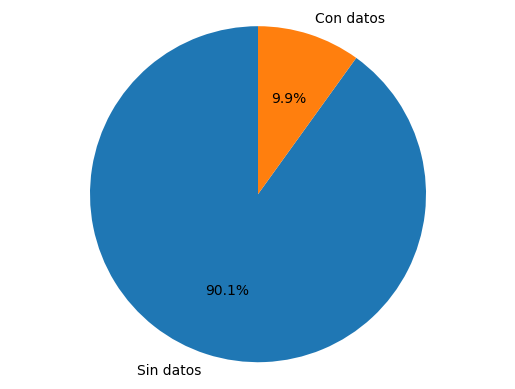

In [131]:
btocollect_gen_nul = df['belongs_to_collection'].apply(lambda x: x == '').sum()
btocollect_gen_som = df['belongs_to_collection'].apply(lambda x: x != '').sum()
tot = df.shape[0]
labels = 'Sin datos', 'Con datos'
sizes = [btocollect_gen_nul, btocollect_gen_som]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

print(f'El {round((btocollect_gen_nul/tot)*100, 2)}% de de esta columna no tiene datos.')

Puede ser relevante, pero es redundante respecto a titulo y tiene una enorme cantidad de datos vacios.

In [132]:
df.drop('belongs_to_collection', axis=1, inplace=True)

## Ajustes adicionales

Para utilizar vectorizacion en el sistema de recomendacion separamos con comas las palabras de las columnas 'title' y 'overview'

In [133]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
df['overview'] = df['overview'].apply(lambda x: x.replace(",","").replace("'",""))
df['overview'] = df['overview'].apply(lambda x: x.split())
df['title_key'] = df['title'].apply(lambda x: x.split())

Para la mejor vectorizacion y procesamiento de datos se almacena las listas en formato str.

In [135]:
df['genres'] = df['genres'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['overview'] = df['overview'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['overview'] = df['overview'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['production_companies'] = df['production_companies'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['production_countries'] = df['production_countries'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['title_key'] = df['title_key'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['title_key'] = df['title_key'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['cast'] = df['cast'].apply(lambda x: ','.join(x) if len(x) > 0 else '')
df['crew'] = df['crew'].apply(lambda x: ','.join(x) if len(x) > 0 else '')

Debido a la vectorizacion de texto que se pretende utilizar para el sistema de recomendacion, los datos que contengan caracteres no romanos se eliminan

In [136]:
regex_pattern = r'[^\u0000-\u007F]'

norom_titl = df[df['title_key'].str.contains(regex_pattern, regex=True)].index
normo_over = df[df['overview'].str.contains(regex_pattern, regex=True)].index
norom_genr = df[df['genres'].str.contains(regex_pattern, regex=True)].index
norom_comp = df[df['production_companies'].str.contains(regex_pattern, regex=True)].index
norom_count = df[df['production_countries'].str.contains(regex_pattern, regex=True)].index
norom_direc = df[df['crew'].str.contains(regex_pattern, regex=True)].index
norom_act = df[df['cast'].str.contains(regex_pattern, regex=True)].index
norom_tot = []

for elemento in norom_titl:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in normo_over:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_genr:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_comp:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_count:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_direc:
    if elemento not in norom_tot:
        norom_tot.append(elemento)
for elemento in norom_act:
    if elemento not in norom_tot:
        norom_tot.append(elemento)

print("Filas donde el titulo contiene caracteres no romanos:")
print(len(norom_titl))

print("Filas donde el resumen contiene caracteres no romanos:")
print(len(normo_over))

print("Filas donde los generos contienen caracteres no romanos:")
print(len(norom_genr))

print("Filas donde las companias productoras contienen caracteres no romanos:")
print(len(norom_comp))

print("Filas donde los paises productores contienen caracteres no romanos:")
print(len(norom_count))

print("Filas donde los directores contienen caracteres no romanos:")
print(len(norom_direc))

print("Filas donde los actores contienen caracteres no romanos:")
print(len(norom_act))

print("Filas totales que contienen caracteres no romanos:")
print(len(norom_tot))

Filas donde el titulo contiene caracteres no romanos:
810
Filas donde el resumen contiene caracteres no romanos:
4904
Filas donde los generos contienen caracteres no romanos:
0
Filas donde las companias productoras contienen caracteres no romanos:
2722
Filas donde los paises productores contienen caracteres no romanos:
0
Filas donde los directores contienen caracteres no romanos:
3196
Filas donde los actores contienen caracteres no romanos:
11765
Filas totales que contienen caracteres no romanos:
16183


In [137]:
df.drop(norom_tot, inplace=True)

Normalizamos release_year y runtime para que quede en valores entre 0 y 1

In [138]:
df['release_year'] = (df['release_year'] - df['release_year'].min()) / (df['release_year'].max() - df['release_year'].min())
df['runtime'] = (df['runtime'] - df['runtime'].min()) / (df['runtime'].max() - df['runtime'].min())

Eliminamos espacios vacios

In [139]:
lis_genr = []
for i in df['genres']:
    lis_genr.append(i.replace(" ",""))
df['genres'] = lis_genr

lis_crew = []
for i in df['crew']:
    lis_crew.append(i.replace(" ",""))
df['crew'] = lis_crew

lis_cast = []
for i in df['cast']:
    lis_cast.append(i.replace(" ",""))
df['cast'] = lis_cast

lis_comp = []
for i in df['production_companies']:
    lis_comp.append(i.replace(" ",""))
df['production_companies'] = lis_comp

lis_count = []
for i in df['production_countries']:
    lis_count.append(i.replace(" ",""))
df['production_countries'] = lis_count

Durante el testeo de la funcion se encontro un incremento excesivo del consumo de memoria al incorporar el año de estreno (release_year) y la duracion de la pelicula (runtime) en el calculo de similitud de coseno, sin un cambio significativo en el resultado de la recomendacion.

Dado que se pide velocidad y un MVP, se decide no incluir esta columna en la evaluacion de recomendaciones.

In [140]:
df.drop('release_year', axis=1, inplace=True)
df.drop('runtime', axis=1, inplace=True)

Se considera que se hicieron cambios suficientes para el correcto funcionamiento de la funcion de recomendacion

Se exporta el archivo a parquet nuevamente.

In [141]:
parquet_filename = '../Datasets/dataset_vect.parquet'
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_filename)